# Problem Statement : To forecast the passengers inflow for next 12 months ( 1 year)

In [1]:
import pandas as pd
airpas = pd.read_csv('AirPassengers.csv')
airpas.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
airpas.shape

(144, 2)

In [3]:
airpas.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [4]:
airpas = airpas.rename(columns = {'#Passengers':'Passenger'})
airpas.tail()

,Month,Passenger
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
144/12  # I have 12 years of data

12.0

In [6]:
airpas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      144 non-null    object
 1   Passenger  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
airpas.Month = pd.to_datetime(airpas.Month , infer_datetime_format=True)
airpas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      144 non-null    datetime64[ns]
 1   Passenger  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


infer_datetime_format is a parameter in the pandas library's to_datetime function that is used to automatically infer the datetime format of a given column in a timeseries dataset. When set to True, the function will attempt to infer the format of the datetime strings in the column and convert them to datetime objects. This can be useful when working with datasets that have inconsistent or non-standard datetime formats.

In [8]:
airpas.set_index(['Month'] , inplace = True)
airpas

,Passenger
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


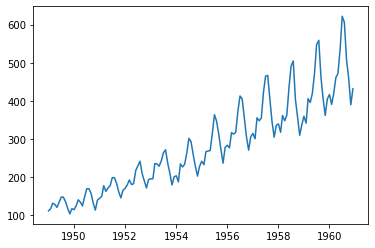

In [10]:
import matplotlib.pyplot as plt
plt.plot(airpas)

even after multiple times of diff series does not become stationery

In [20]:
import numpy as np
air_pas_log = np.log(airpas)

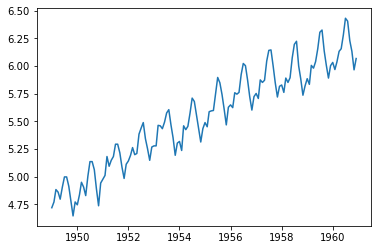

In [21]:
plt.plot(air_pas_log)

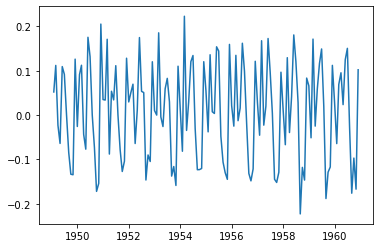

In [22]:
plt.plot(air_pas_log.diff())

In [23]:
# so when we do forecast , forcasting , would also be in log
# so we need to take anti log to get the data in some range(scale)

In [24]:
# ARIMA hata diya gaya hai
# problem associated with ARIMA(IT cannot handle seasonality)
# so that is why we have a SARIMA 
# SARIMAX is father of sarima

In [25]:
# How to use sarima ... we will use auto_arima (and what ever values we will get from auto_arima) just pass them in sarima

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [27]:
# agar seasonal_decompose aya to samaj jana sarima kre hai 

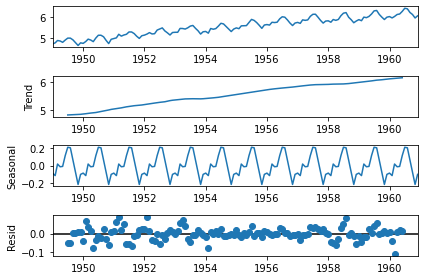

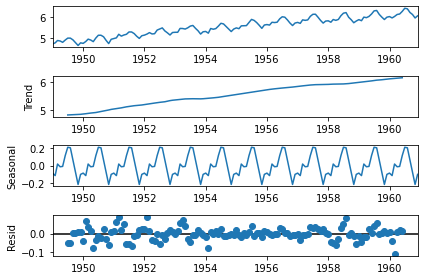

In [28]:
# SArima 
result = seasonal_decompose(air_pas_log)
result.plot()
# this plot is for just to get the idea about your data

In [30]:
auto_arima(air_pas_log , seasonal = True , m = 12) # m = 12 month time eperiod of seasonality

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [31]:
# order = (2,0,0) 
# seasonal_order = (0,1,1,12) p,d,q,seasonal
# what ever values you get from auto_arima pass them in sarima
model_sarima = SARIMAX(air_pas_log , order = (2,0,0) , seasonal_order = (0,1,1,12));

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
airpas_model = model_sarima.fit()
pred_values = airpas_model.predict(start = 144 , end = 155)
pred_values

1961-01-01    6.103792
1961-02-01    6.045733
1961-03-01    6.162398
1961-04-01    6.188803
1961-05-01    6.220812
1961-06-01    6.355731
1961-07-01    6.493041
1961-08-01    6.487380
1961-09-01    6.307884
1961-10-01    6.191002
1961-11-01    6.044216
1961-12-01    6.147517
Freq: MS, Name: predicted_mean, dtype: float64

In [34]:
pred_values_1 = np.exp(pred_values)
pred_values_1

1961-01-01    447.551705
1961-02-01    422.307385
1961-03-01    474.564710
1961-04-01    487.262466
1961-05-01    503.111563
1961-06-01    575.782802
1961-07-01    660.528706
1961-08-01    656.800127
1961-09-01    548.882435
1961-10-01    488.335072
1961-11-01    421.667124
1961-12-01    467.555049
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Month'>

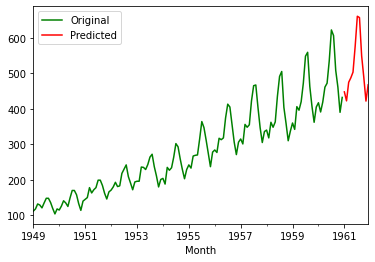

In [35]:
df = pd.DataFrame()
df['Predicted'] = pred_values_1
date_for_pred = ['1961-01-01' , '1961-02-01','1961-03-01','1961-04-01','1961-05-01',
                 '1961-06-01' , '1961-07-01','1961-08-01','1961-09-01','1961-10-01',
                 '1961-11-01','1961-12-01']
df['Month'] = date_for_pred
df.Month = pd.to_datetime(df.Month , infer_datetime_format = True)
df = df.set_index(['Month'])
airpas['Passenger'].plot(legend = True , label = 'Original' , color = 'green')
df['Predicted']    .plot(legend = True , label ='Predicted' , color = 'red')

# As you can see that at last red curve is my preddicted curve which is showing similar flow with past curves ..it means my prediction will going good.